# Hypotheses testing 

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
import statsmodels.api as sm
from matplotlib.pyplot import figure

In [225]:
data = pd.read_csv("..\data\salaries.csv")
salary = data.salary_in_usd
#check for nans
print("Numer of NaNs in the data = " + str(data.isnull().sum().sum()))

#Filter relevant columns
data = data[['experience_level','job_title','employment_type','salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']]

Numer of NaNs in the data = 0


In [226]:
data.head()
#inspect data

,experience_level,job_title,employment_type,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,MI,Data Scientist,FT,82500,US,100,US,S
1,SE,Copywriter,FL,175477,CA,100,CA,L
2,SE,Information Security Engineer,FT,104000,US,100,US,L
3,MI,Information Security Specialist,FT,72366,CA,100,CA,L
4,MI,Information Security Specialist,FT,78745,CA,100,CA,L


In [227]:
# FIlter only entry-level, full-time jobs in the USA.
entry = data[data["experience_level"]=="EN"].query('employment_type=="FT"')
entry = entry[entry["employee_residence"]=="US"]
print(entry.shape)
#Deivide into fully remote and partly remote groups
half = entry[entry["remote_ratio"]<=50].salary_in_usd
full = entry[entry["remote_ratio"]>50].salary_in_usd
half.reset_index(drop=True, inplace=True)
full.reset_index(drop=True, inplace=True)
print(full.shape)
print(half.shape)

(120, 8)
(82,)
(38,)


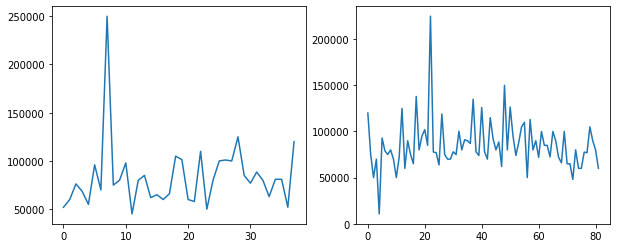

In [231]:
# quick inspection
figure(figsize=(10, 4),)
plt.subplot(121)
plt.plot(half)
plt.subplot(122)
plt.plot(full)
plt.show()

In [147]:
# calculating means
print(np.mean(half))
print(np.mean(full))

83200.47368421052
85471.34146341463


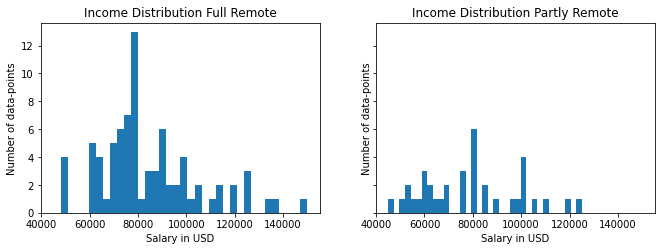

In [214]:
# Figure for latex : incomes_remote_levels.pdf

fig, axs = plt.subplots(1,2, figsize=(11,3.5 ), sharex=True, sharey=True)
axs[0].hist(full, 35)
axs[1].hist(half, 35)


axs[0].set_title("Income Distribution Full Remote")
axs[1].set_title("Income Distribution Partly Remote")
plt.setp(axs[0], ylabel='Number of data-points')
plt.setp(axs[0], xlabel='Salary in USD')
plt.setp(axs[1], ylabel='Number of data-points')
plt.setp(axs[1], xlabel='Salary in USD')
plt.plot()
plt.savefig("incomes_remote_levels.pdf")

In [235]:
# Removing Outliers

full = full[full<200000]
full = full[full>15000]
half = half[half<200000]

# calculating variance

print("Standard deviation of partly remote-jobs = " + str(np.std(half)))
print("Standard deviation of partly fully -jobs = " + str(np.std(full)))

Standard deviation of partly remote-jobs = 19998.262637176224
Standard deviation of partly fully -jobs = 20902.00161430419


c:\users\d92284\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
c:\users\d92284\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


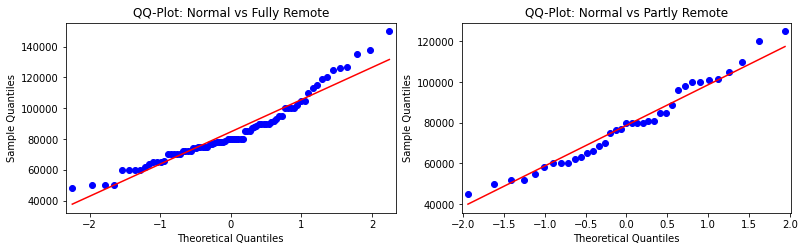

In [236]:
# QQ Plots for paper QQ.pdf

fig = plt.figure(figsize=(13,3.5 ))

ax = fig.add_subplot(1, 2, 2)
sm.graphics.qqplot(half, line='s',ax=ax)
ax.set_title("QQ-Plot: Normal vs Partly Remote")

ax = fig.add_subplot(1, 2, 1)
sm.graphics.qqplot(full, line='s', ax=ax)
ax.set_title("QQ-Plot: Normal vs Fully Remote")
plt.savefig("QQ.pdf")

In [237]:
stats.ttest_ind(half, full, equal_var=True)

Ttest_indResult(statistic=-1.4439050881872895, pvalue=0.15148449050394425)